In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from plot_funcs import label_axes

In [12]:
plt.style.use('default')
# plt.style.use('nature_style.mplstyle')
plt.style.use('thesis_style.mplstyle')

In [3]:
df = pd.read_csv('treatment.csv')

In [4]:
df.head()

r_d  theta  repetition     kappa  genetic_entropy  phenotype_entropy  \
0  0.0    0.0           0 -1.635913         2.687159           0.694025   
1  0.0    0.0           1 -0.865879         2.060866           0.807282   
2  0.0    0.0           2 -1.545359         2.737255           0.758394   
3  0.0    0.0           3 -1.495602         2.615735           0.744453   
4  0.0    0.0           4 -1.837688         2.675741           0.650427   

   rectime  
0    129.0  
1    154.0  
2    140.0  
3    165.0  
4    122.0

In [5]:
df['growthrate'] = np.log(1000) / df.rectime

<Axes: xlabel='genetic_entropy', ylabel='phenotype_entropy'>

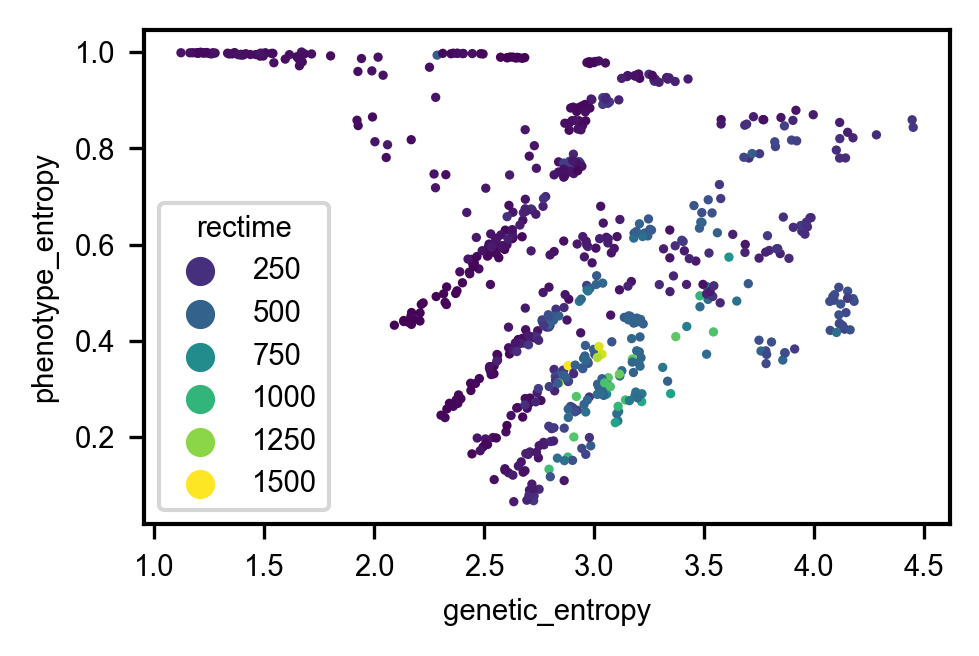

In [6]:
sns.scatterplot(data=df, x='genetic_entropy', y='phenotype_entropy', hue='rectime', palette='viridis', s=5, linewidth=0)

C:\ProgramData\anaconda3\envs\py311\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)


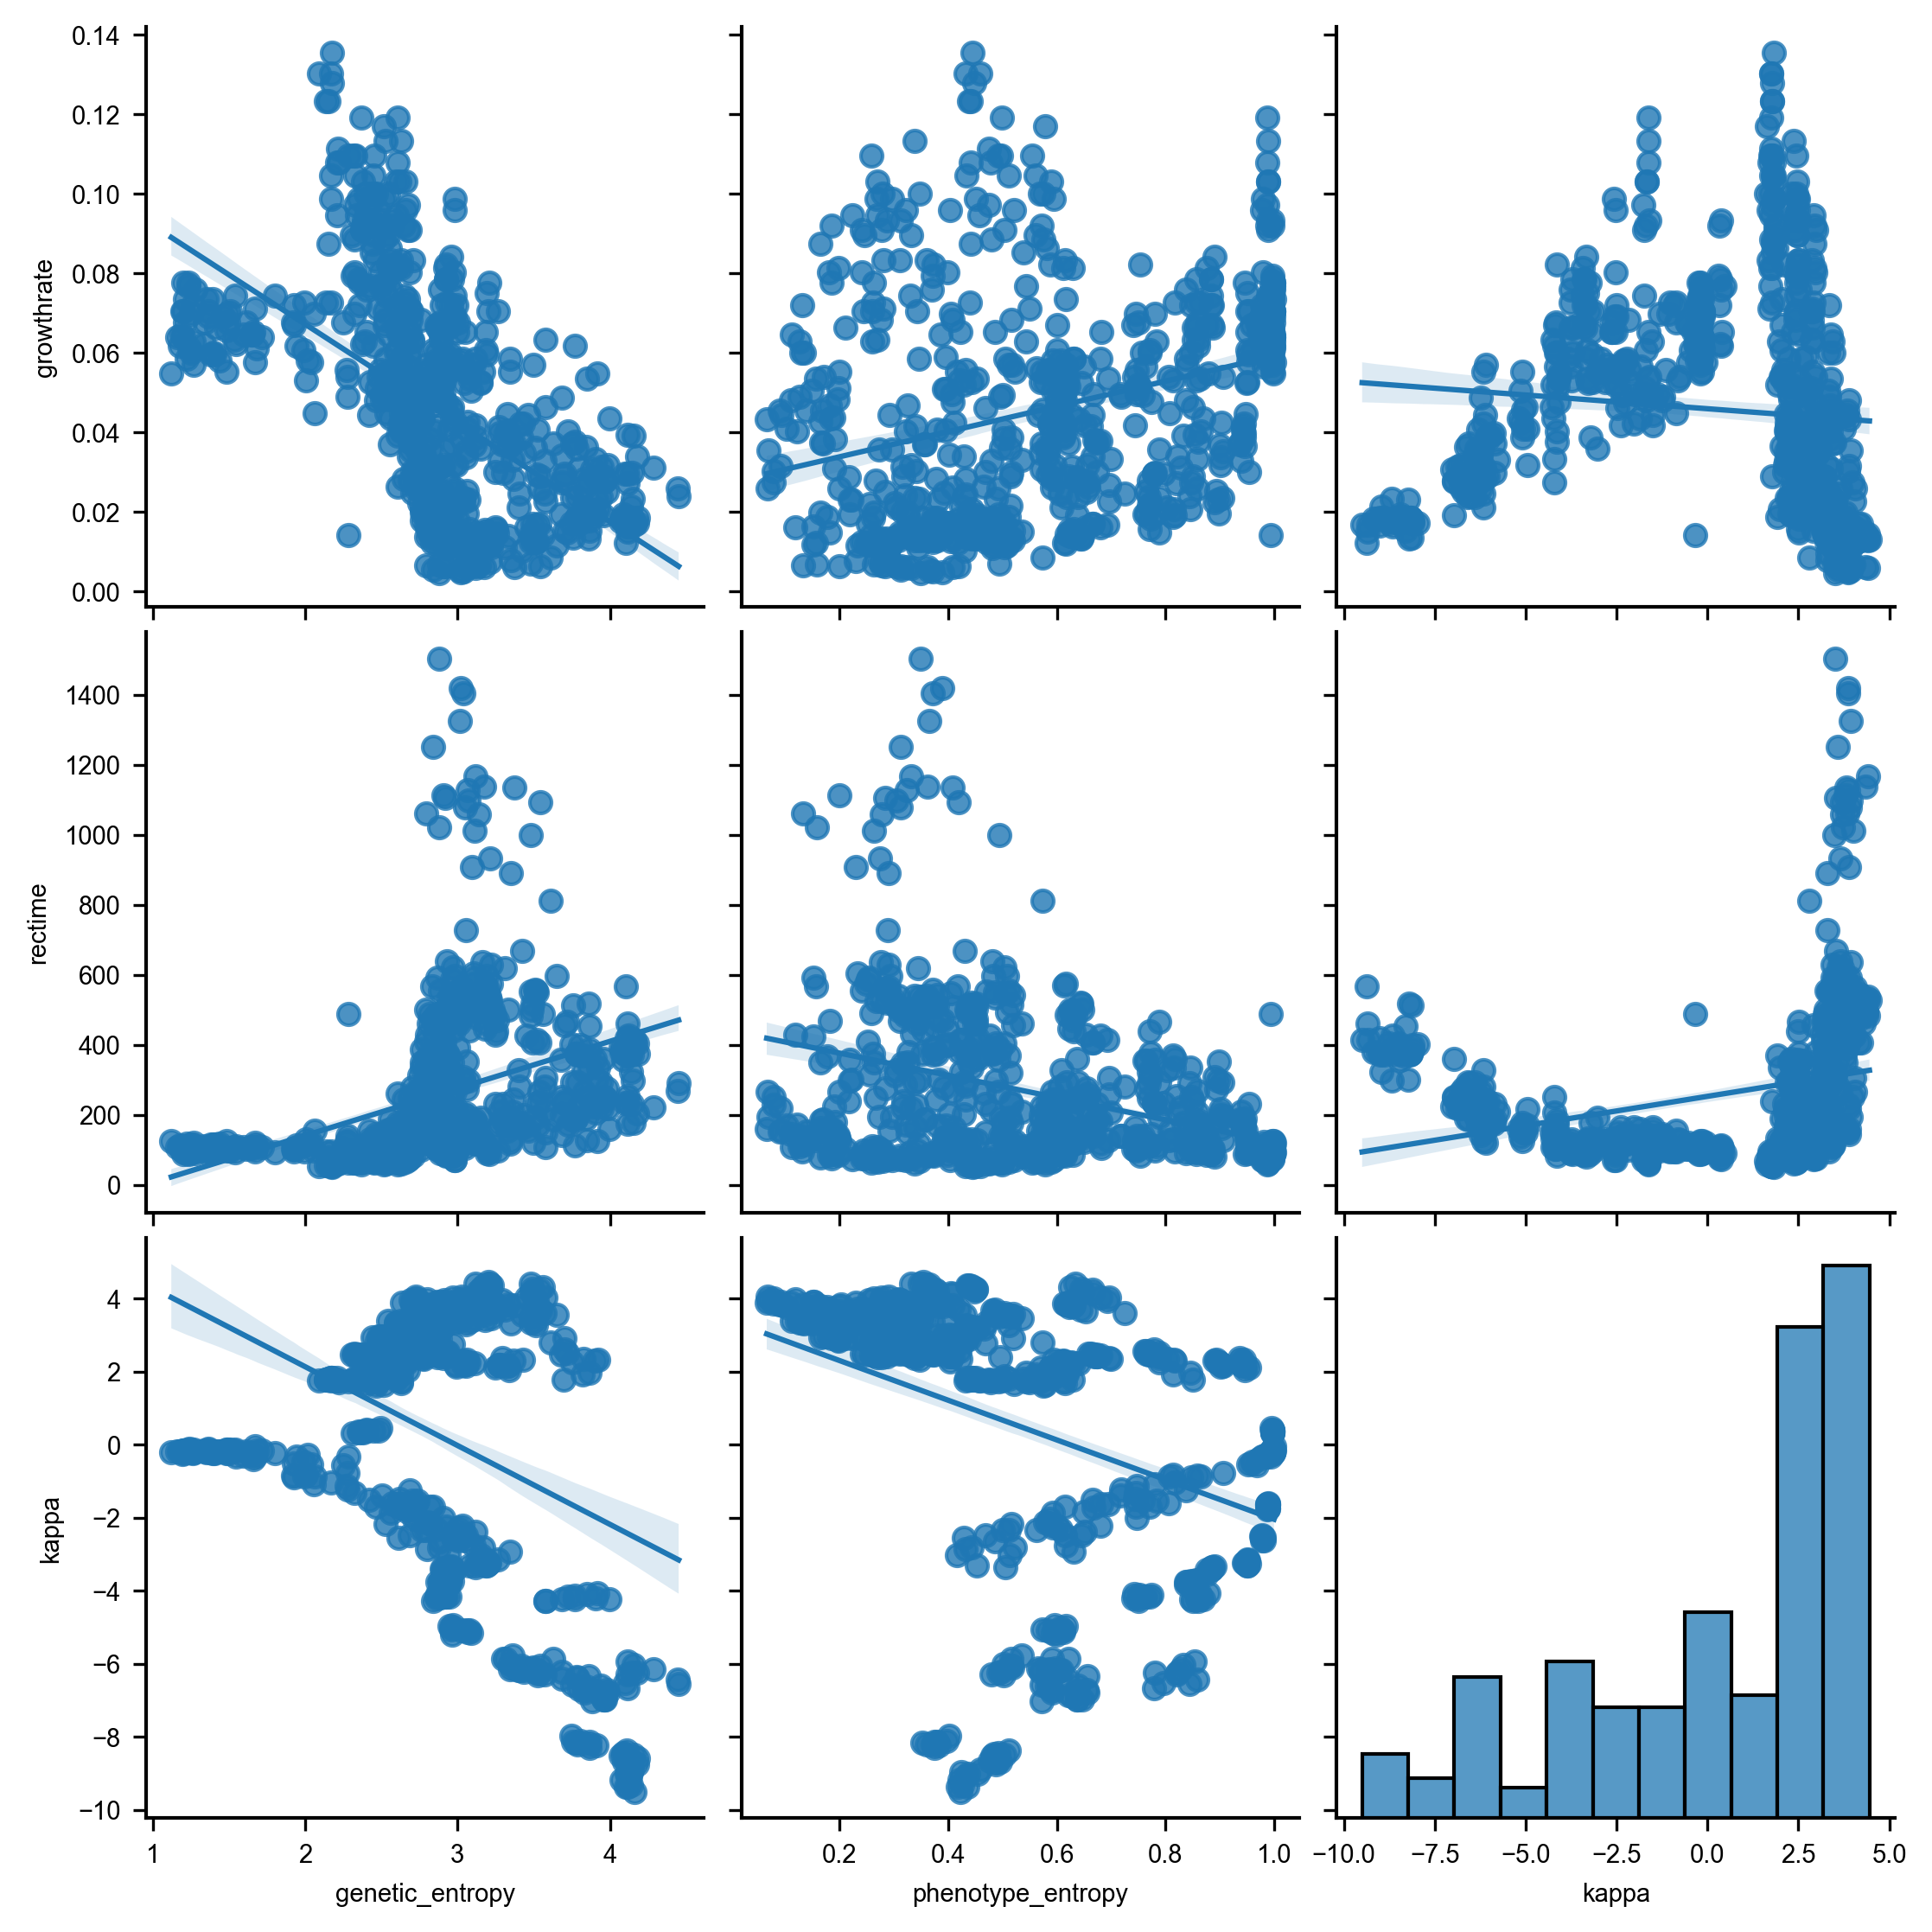

In [7]:
# plot a correlation seaborn plot
sns.pairplot(df, y_vars=['growthrate', 'rectime', 'kappa'], x_vars=['genetic_entropy', 'phenotype_entropy', 'kappa'], kind='reg', palette='viridis', plot_kws=dict(ci=95))

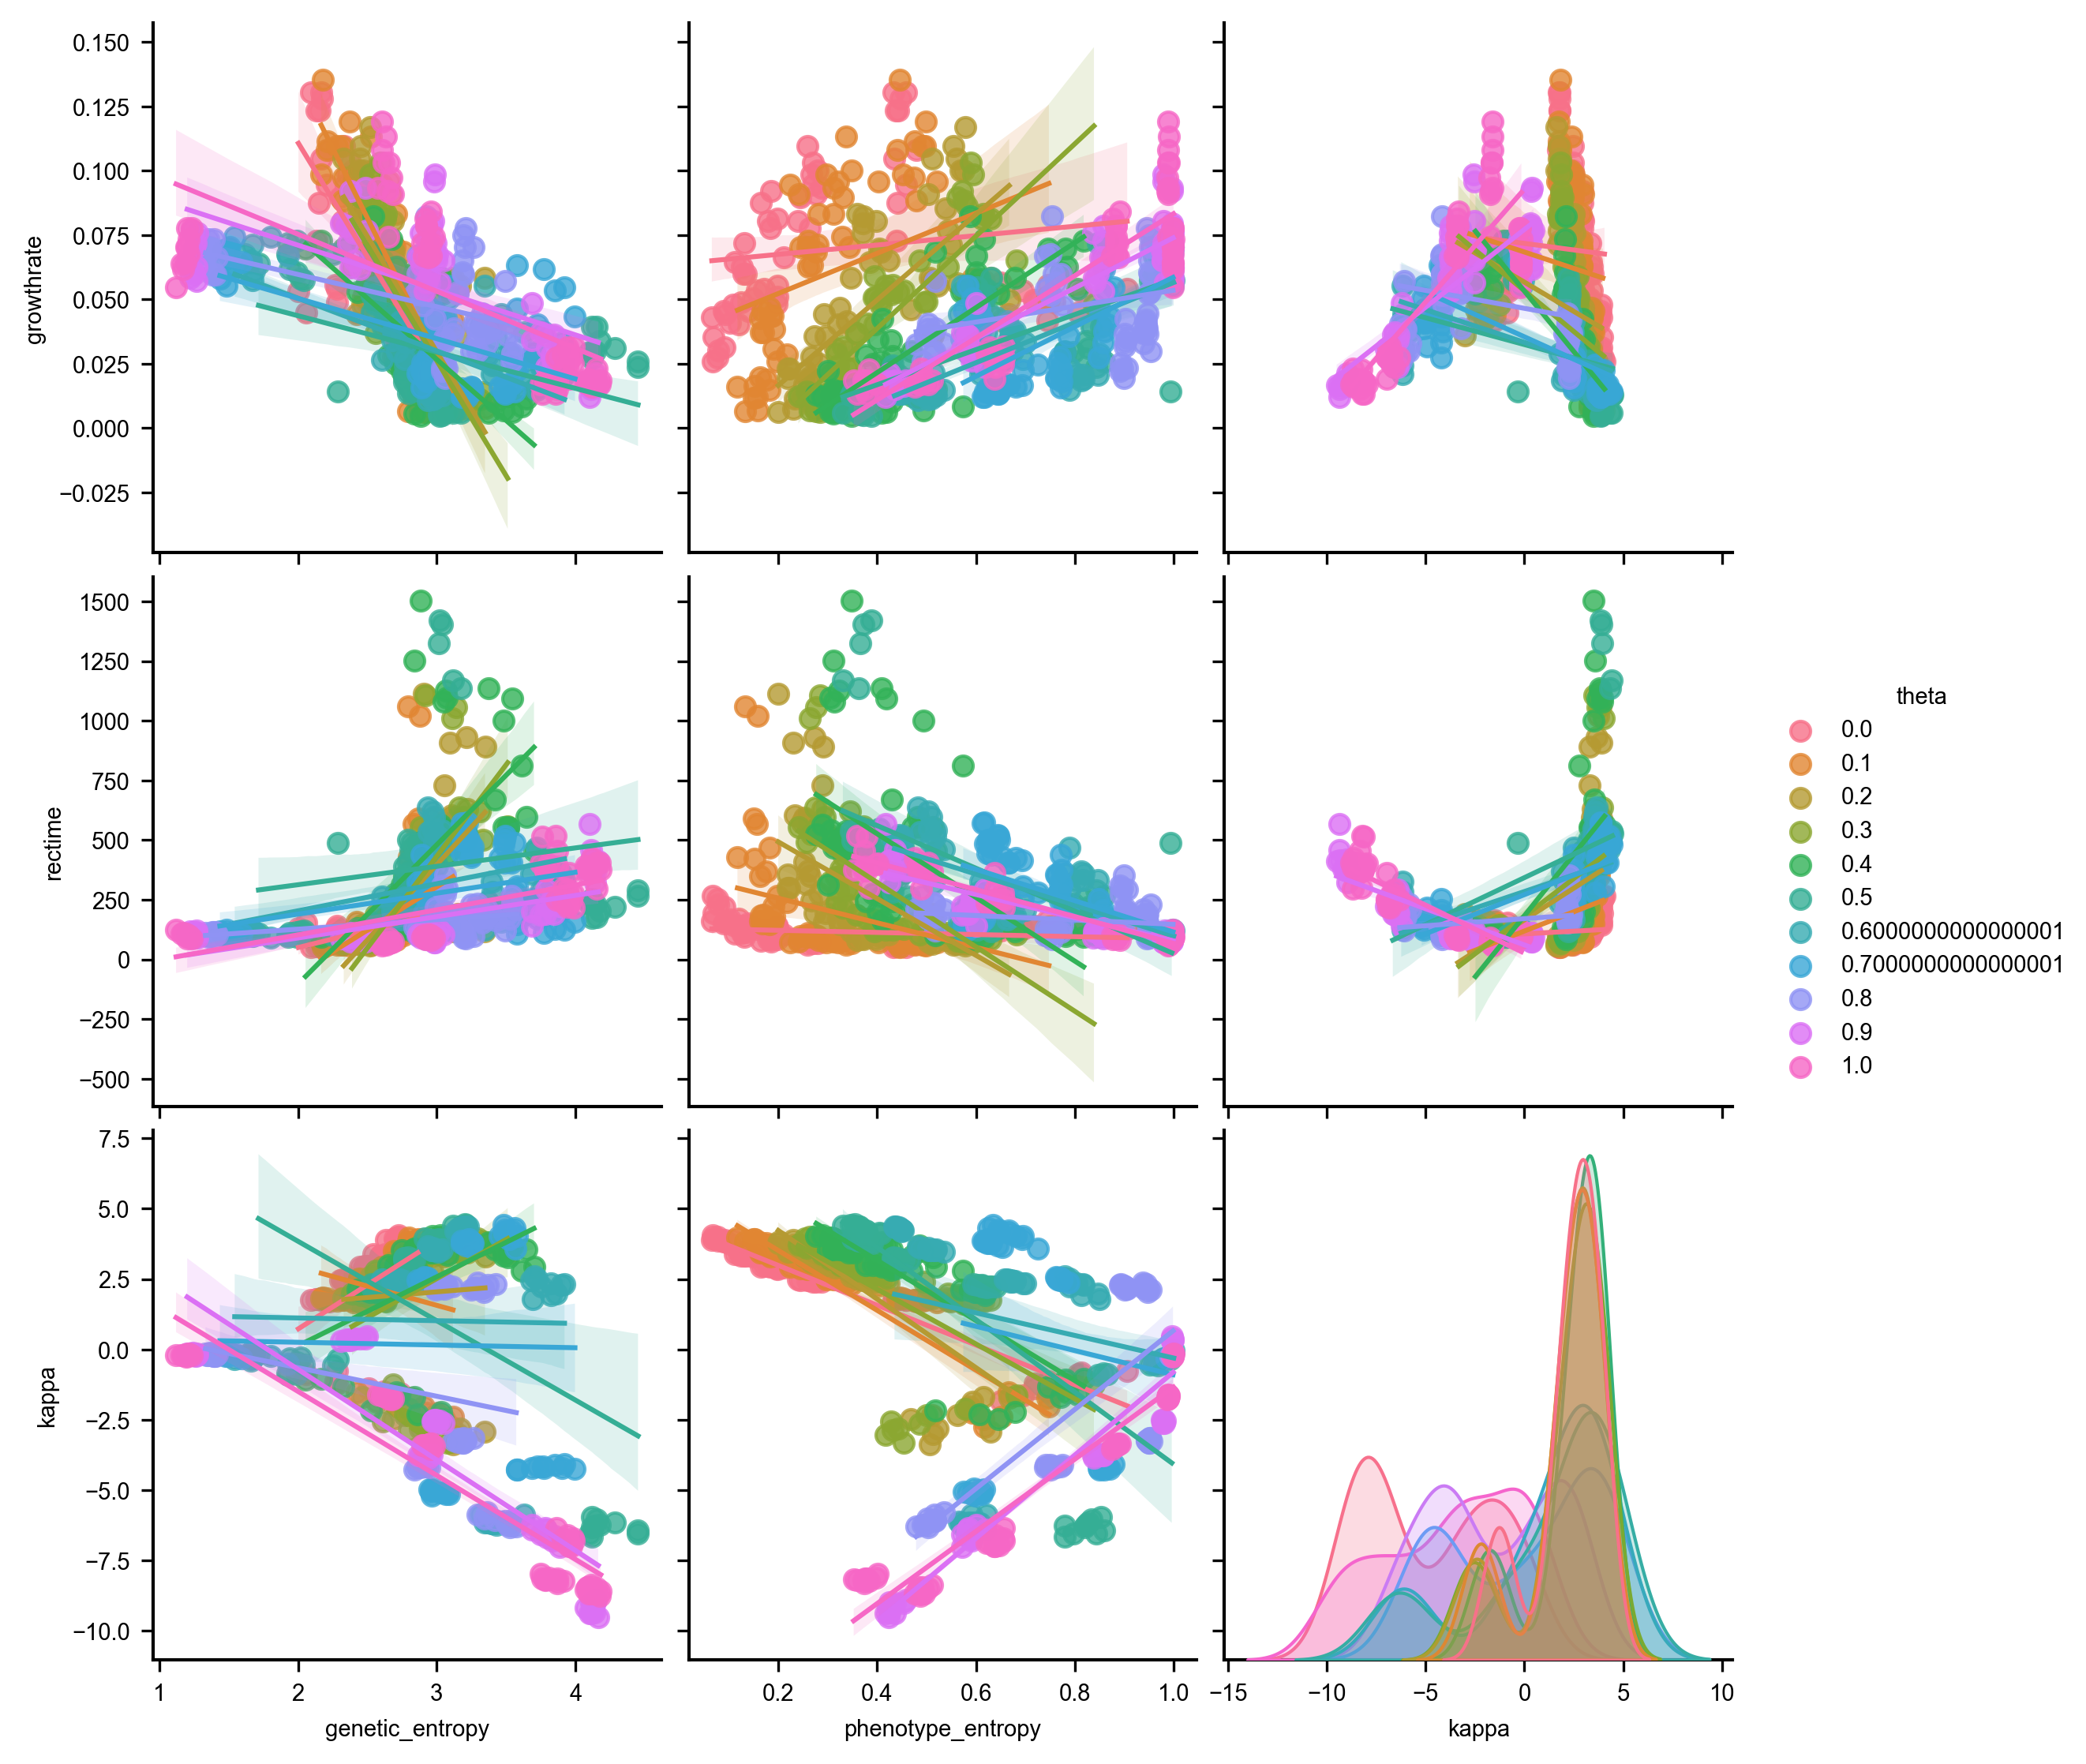

In [8]:
sns.pairplot(df, y_vars=['growthrate', 'rectime', 'kappa'], x_vars=['genetic_entropy', 'phenotype_entropy', 'kappa'], kind='reg', hue='theta', plot_kws=dict(ci=95), palette='husl')

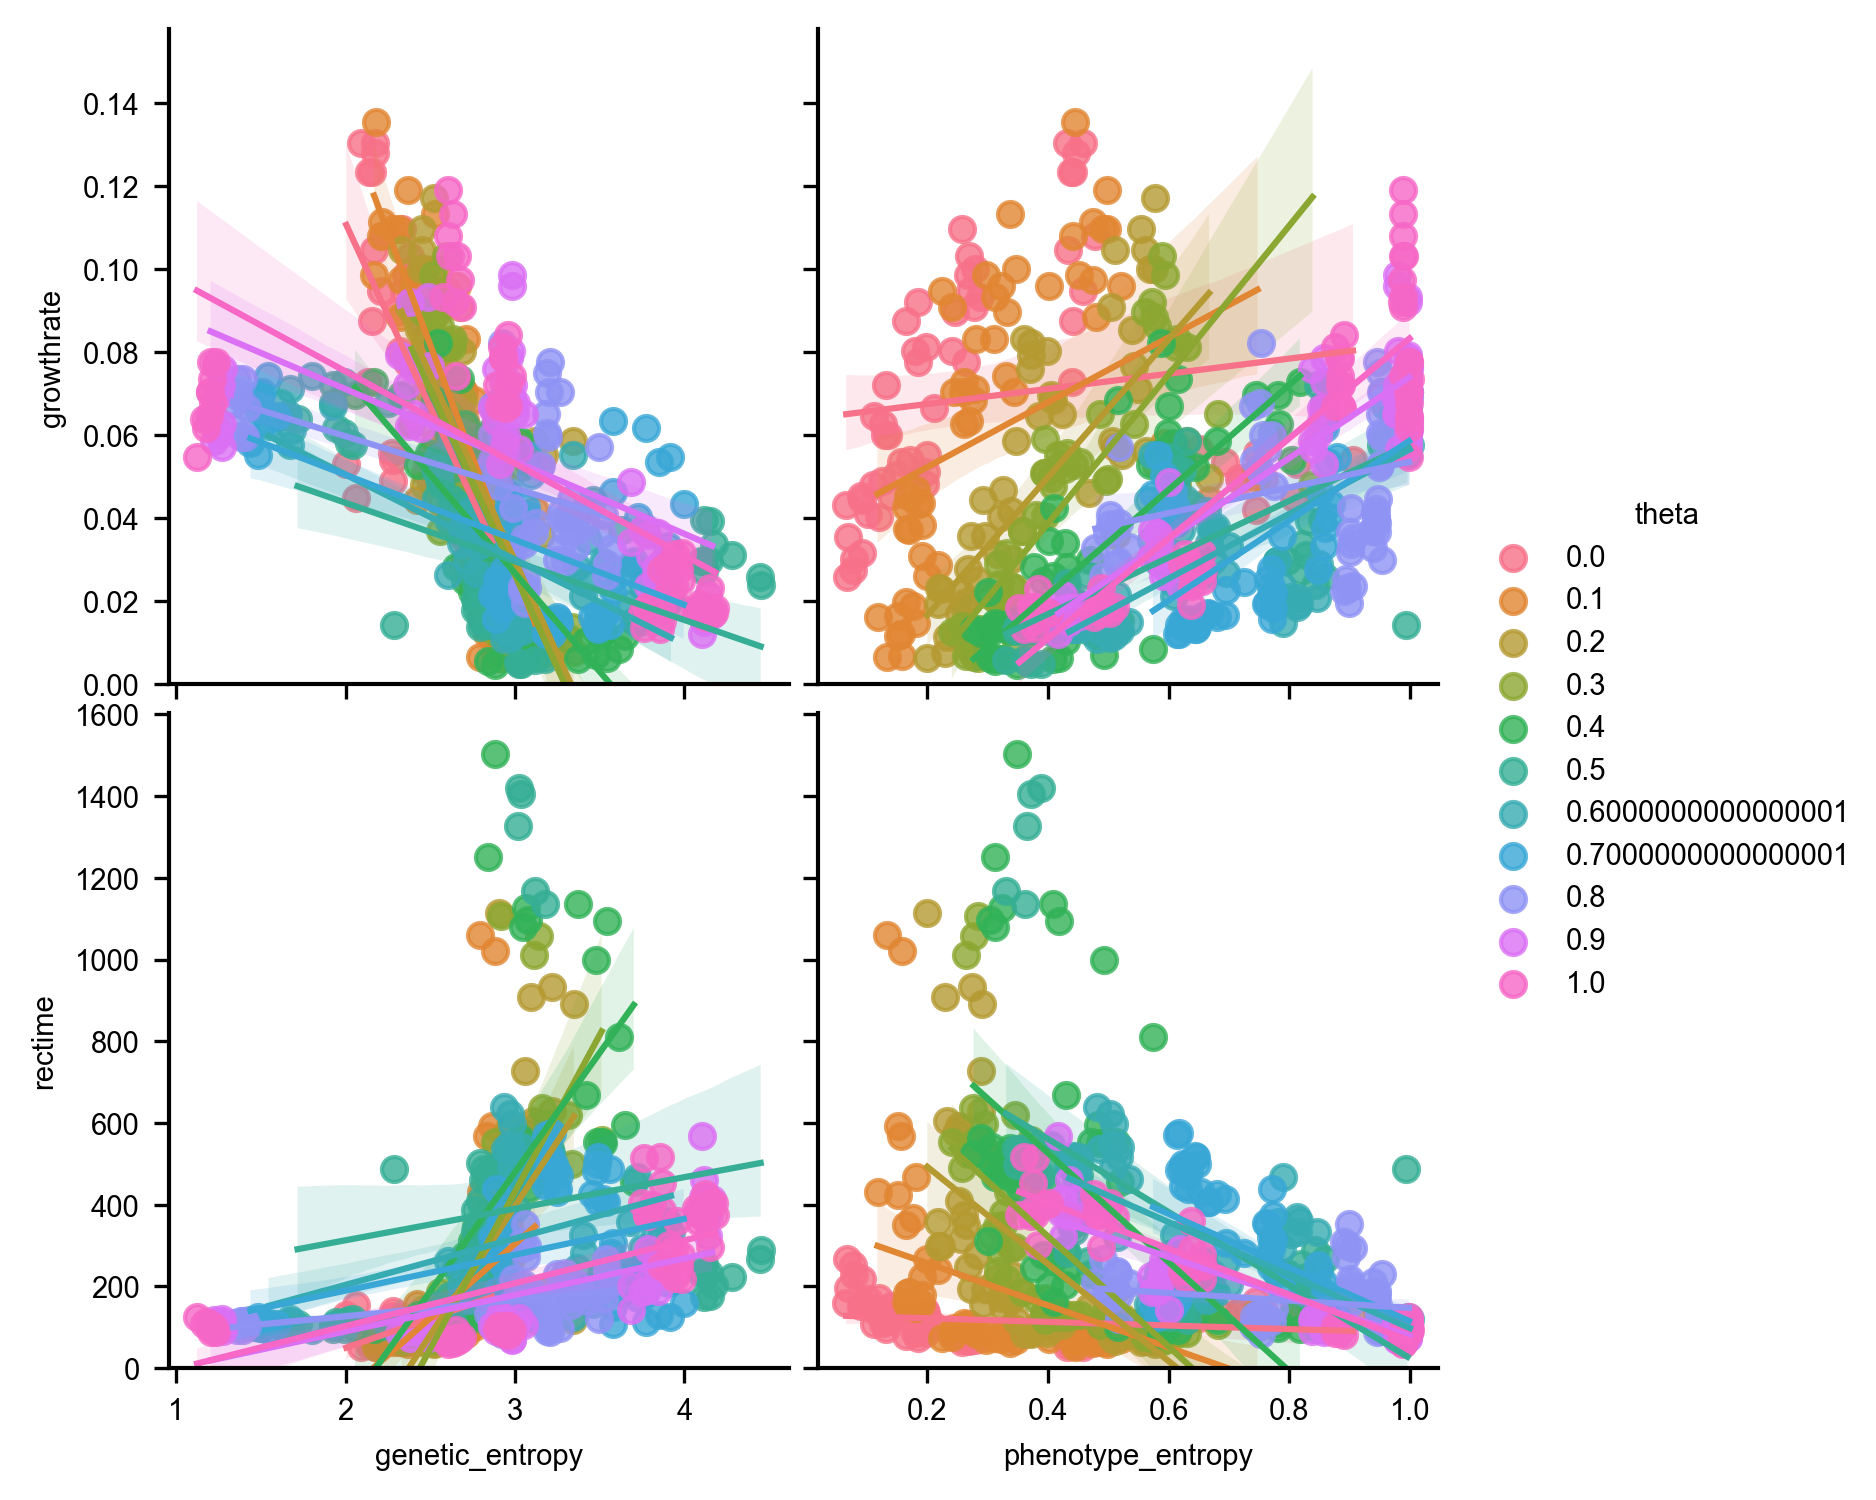

In [9]:
g = sns.pairplot(df, y_vars=['growthrate', 'rectime'], x_vars=['genetic_entropy', 'phenotype_entropy'], kind='reg', hue='theta', plot_kws=dict(ci=95), palette='husl')
g.set(ylim=0)

(0.0, 1578.9412979452202)

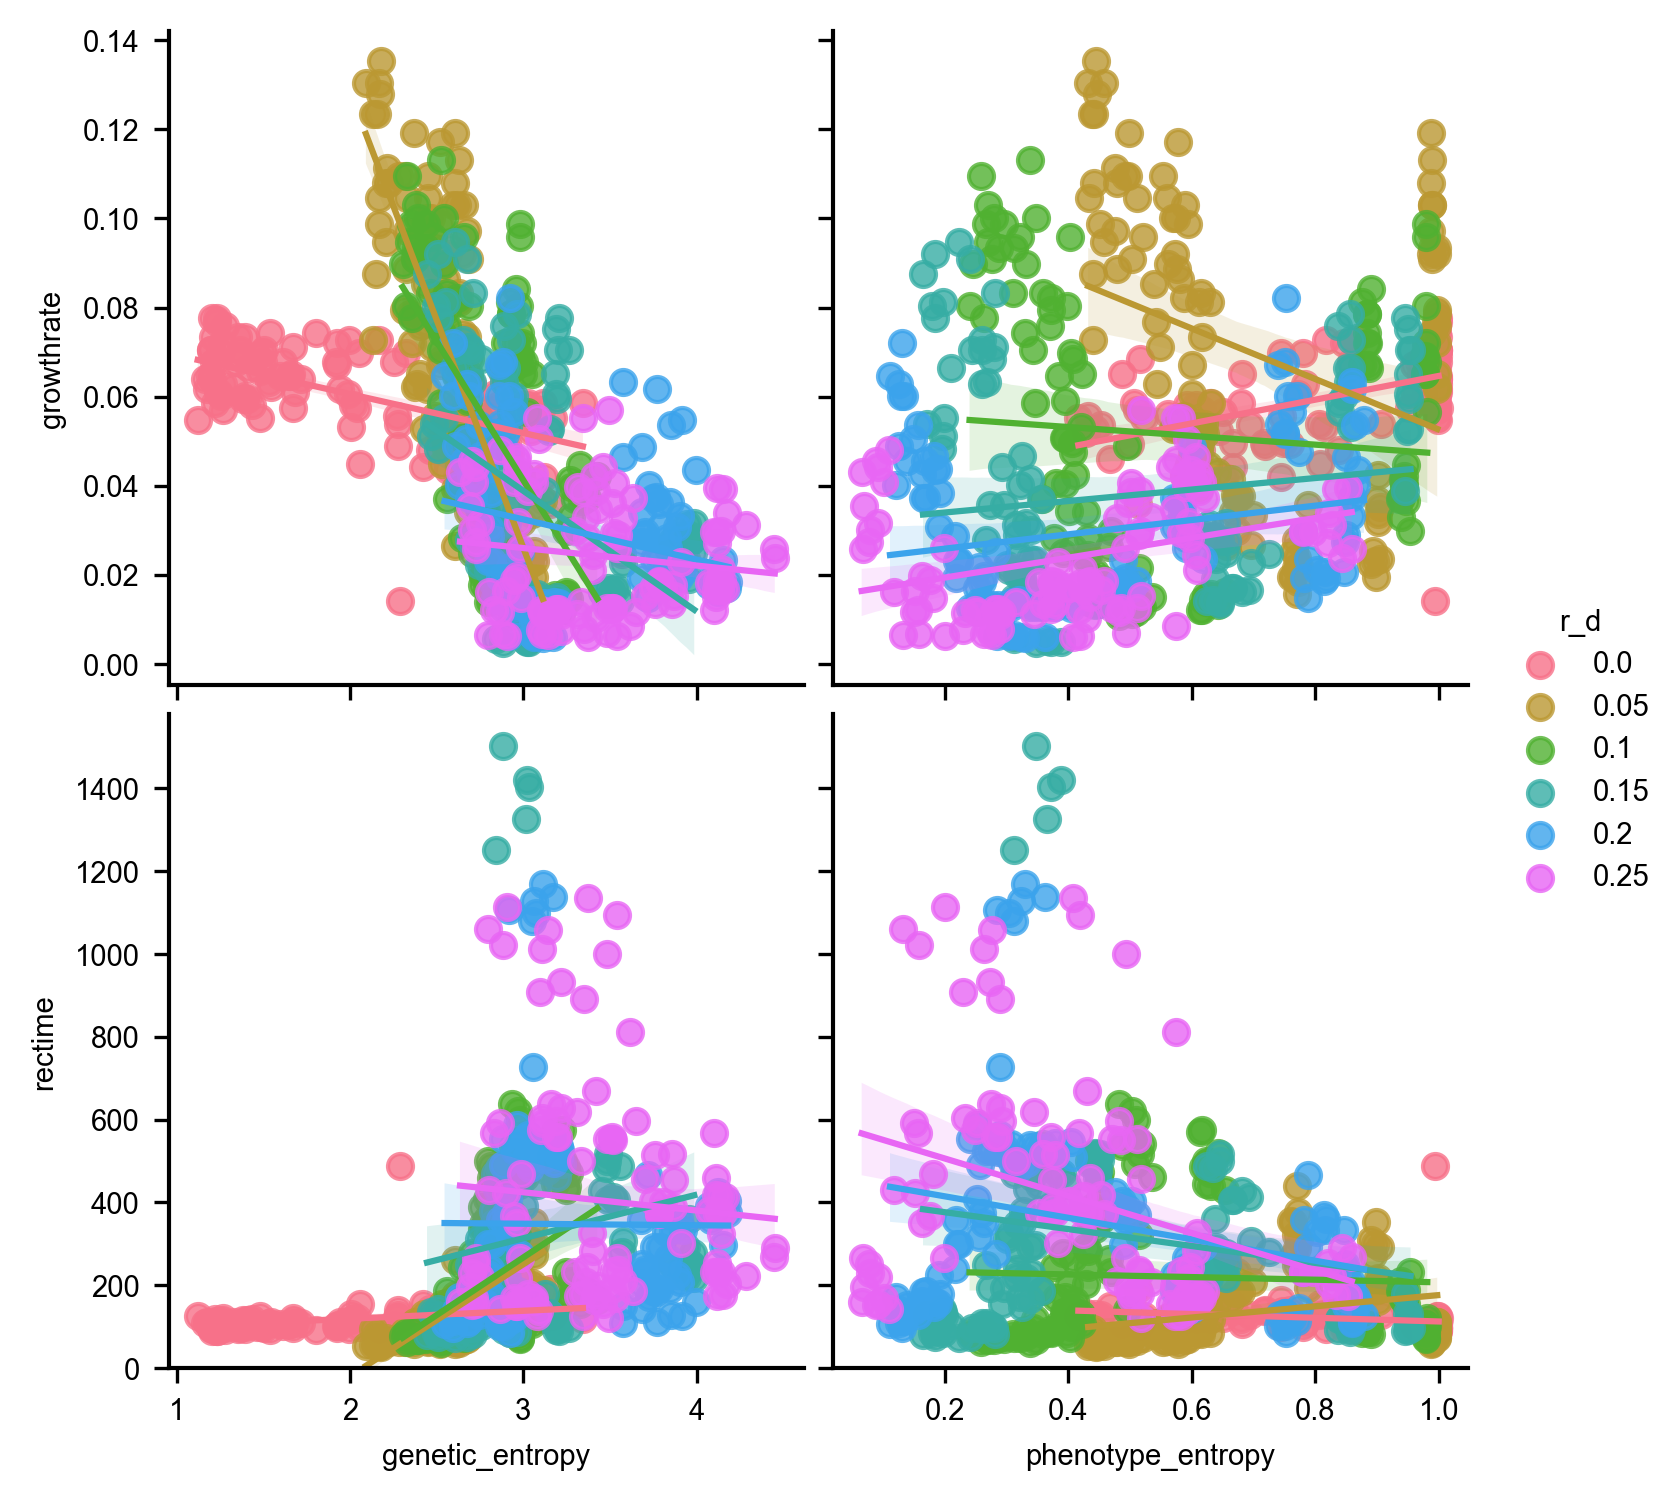

In [10]:
sns.pairplot(df, y_vars=['growthrate', 'rectime'], x_vars=['genetic_entropy', 'phenotype_entropy'], kind='reg', hue='r_d', plot_kws=dict(ci=95), palette='husl')
plt.ylim(0)

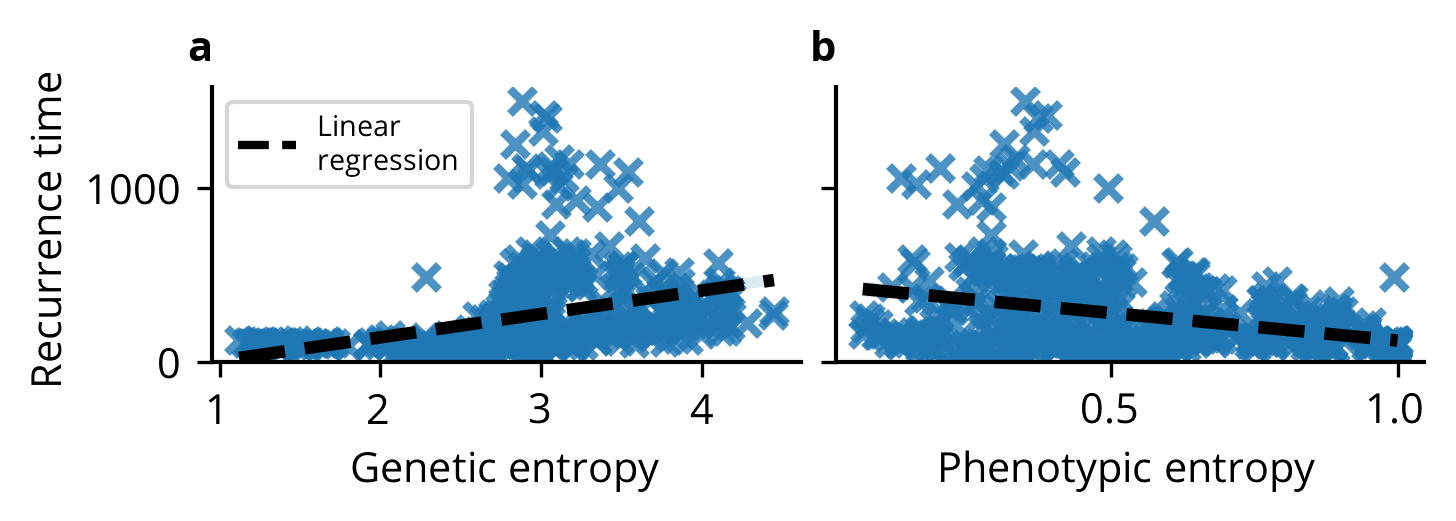

In [30]:
# figsize = 3, 3.
golden_ratio = (np.sqrt(5) + 1.0) / 2.0
# get default figsize
wi, le = plt.rcParams['figure.figsize']
le = wi / golden_ratio 
figsize = wi, le
g = sns.pairplot(df, y_vars=['rectime'], x_vars=['genetic_entropy', 'phenotype_entropy'], kind='reg', palette='viridis', height=figsize[1]/2, aspect=figsize[0]/figsize[1], markers='x')
g.axes[0][0].set_xlabel('Genetic entropy')
g.axes[0][1].set_xlabel('Phenotypic entropy')
g.axes[0][0].set_ylim(0)
for ax in g.axes.flatten():
    for line in ax.lines:
        line.set_color('k')
        # set linestyle to dashed for the regression lines
        line.set_linestyle('--')

g.set(ylabel='Recurrence time')

g.axes[0][0].plot([2, 2], [0, 0], color='k', linestyle='--', label='Linear\nregression')
g.axes[0][0].legend(fontsize='x-small', loc='upper left')
label_axes(g.axes.flatten(), usetex=False)

plt.savefig('recurrence_time_vs_entropy_thesis.pdf', bbox_inches='tight')
# plt.savefig('recurrence_time_vs_entropy.png', bbox_inches='tight')